# ***Final Notebook for project***

The following are the what exactly will be included to find hte best neighborhood:

Flood zones- the best neighborhoods are the ones that have been flooded thuse allowing for the most amount of
safety from humans and human interaction.

Arrests- the best Neighborhoods are the ones that have the lowest crime rate, considering that safety is best for the neighborhood.

Condemned housing- The best Neighborhoods that have the greatest amount of condemned housing, since this would indicate which places are the most desolate and unihabited by the humans.

In [2]:
import pandas as pd
import geopandas
import numpy as np
import fpsnippets
%matplotlib inline
from shapely.geometry import polygon
import geopandas
import matplotlib.pyplot as plt


In [3]:
con=pd.read_csv("Condemed.csv")
hood=geopandas.read_file("Neighborhoods_.shx")

In [4]:
flood = pd.read_csv("floods.csv",index_col="_id")

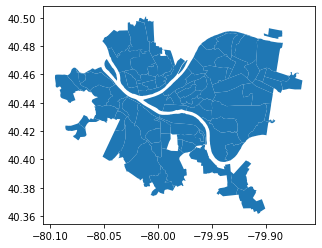

In [5]:
#get the url
url2 = "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/neighborhoods.zip"
neigh = geopandas.read_file(url2) # read in the shapefile
neigh.plot() # plot the geopandas dataframe

**getting addesses**

In [6]:
con_mask=con["address"]!="No primary address specified" #remove houses with no address
condemed=con[con_mask]
cond_mask=condemed["parcel_id"]!="invalid input" #remove houses with invalid input
condemed=condemed[cond_mask]
condm_mask=condemed["parcel_id"]!="invalid_input"
condemed=condemed[condm_mask]

**zip code sorting **

In [7]:
#creates a zip code list
zip_code=[]
for x, row in condemed.iterrows():

    temp=row["address"]
   
    temp=str(temp)

    zipe=temp[-5:]
    zipe=int(zipe)
    zip_code.append(zipe)

#creates a column for zip code
condemed["Zip Code"]=zip_code


In [8]:
neighborhoods=[] #creates a list of potential neigborhoodss
all_zip_codes=[] #and their zip codes for each block
for x in range (len(zip_code)):
    
    temp=zip_code[x]
    nh=fpsnippets.zip_to_neighborhoods(temp)

    for y in nh:
        neighborhoods.append(y)
        all_zip_codes.append(temp)
data = { #creates a dataframe to merge the two lists together
    "Neighborhood": neighborhoods,
    "Zip Code": all_zip_codes
}
df = pd.DataFrame(data)

#neighborhoods.head(10)

In [9]:
final_df=pd.merge(condemed, df) #group them together
final_df=final_df.groupby("Neighborhood")["_id"].count() #and get a set number
final_df=final_df.dropna() 
final_df.head(60)

Neighborhood
Allegheny Center             170549
Allegheny West               170549
Allentown                    293457
Arlington                    290321
Arlington Heights            290321
Banksville                     8242
Bedford Dwellings             81770
Beechview                      9538
Beltzhoover                  290657
Bloomfield                    71575
Bluff                         81770
Bon Air                      287521
Brighton Heights             211758
Brookline                    289218
California-Kirkbride         170549
Carrick                      287810
Central Business District     80138
Central Lawrenceville          9860
Central Northside            211758
Central Oakland                1681
Chartiers City                17956
Chateau                      250638
Crafton Heights               25886
Crawford-Roberts              80089
Duquesne Heights              11378
East Allegheny               165649
East Carnegie                  1370
East Hills     

In [10]:
house_map=hood.merge(final_df, how="left",left_on="hood", right_on="Neighborhood")



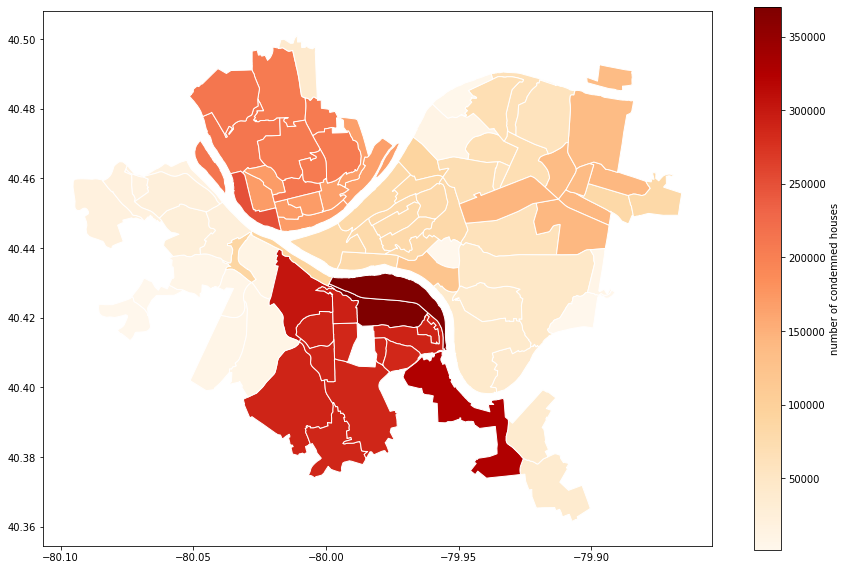

In [11]:
house_map.plot(column="_id",cmap="OrRd",edgecolor="white",legend=True,legend_kwds={"label":"number of condemned houses"},figsize=(15,10))

Being someone who has no idea about anything related to Pittsburgh, I don't have a favorite Neighborhood or expected a neighborhood to have the most condemned houses. As a disclamier, because the zipcode doesn't narrow done to a specific neighborhood, I had to put the condemned houses in all the potential neighborhoods it could be in. So the the overall amount of condemned houses per neighborhood is much higher than it is actually is, but the proportion should be roughly the same. I figured the Oakland area wouldn't have much condemned houses because all the students from the Universities are renting them. I heard from people to avoid South Side (South Shore?). That goes alone with the South Side having the most condemned housing proportionally, meaning there are the most amount of free houses as well as freedom from human interaction.

**maps for flooding**

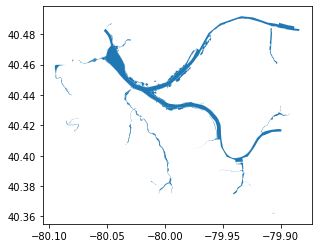

In [12]:
url = "https://data.wprdc.org/dataset/4c9b78ee-d044-418d-97c9-130ccdcb3435/resource/ff36bc74-308d-475f-a543-92e3d5b08391/download/flood_zones.zip"
pai= geopandas.read_file(url) 
pai.plot()
#undermine=neighborhoods.merge(undermined, how='left', left_on='hood', right_on='neighborhood')

/opt/tljh/user/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/opt/tljh/user/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


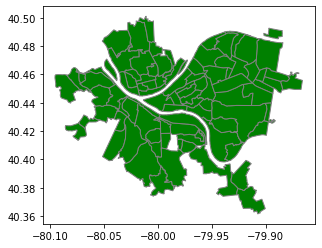

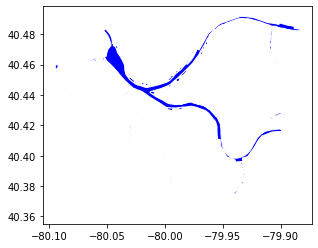

In [13]:
#neigh.merge(_id, how='left', left_on='shape_area', right_on='neighborhood')
neigh.plot(pai,color = 'green', edgecolor = "gray")
pai.plot(neigh, color = 'blue', edgecolor = "white")

**Crosses the maps and where there are flood zones**

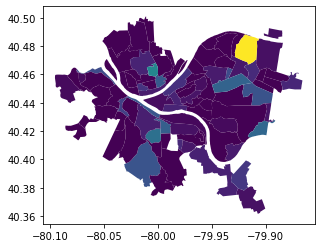

In [14]:
tot= neigh.merge(pai, how="cross")
#ax = ax
neigh['flood_area'] = 0
pai['geometry'] = pai.buffer(0)
for row_flood in pai.iterrows():
    for row_neigh in neigh.iterrows():
        intersection = row_flood[1]['geometry'].intersection(row_neigh[1]['geometry'])
        if(intersection.area)> 0:
            row_id = row_neigh[1].loc['OBJECTID']
            neigh.loc[row_id,'flood_area'] += intersection.area
neigh.plot(column='flood_area',legend_kwds={'label': "flooded"})

/opt/tljh/user/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/opt/tljh/user/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


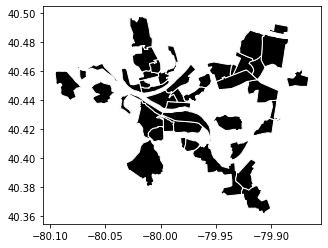

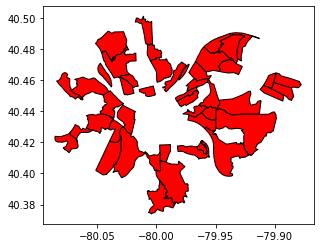

In [15]:
#only regions with flooding
greatZ= neigh.loc[neigh['flood_area'] > 0]
greatZ.plot(neigh,color = 'black', edgecolor = 'white')
badZ = neigh.loc[neigh['flood_area'] == 0]
badZ.plot(neigh,color = 'red', edgecolor = 'black')

In [36]:
greatZ
badZ

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,flood_area,is_flood
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455...",0.0,2
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443...",0.0,2
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.93530 40.472...",0.0,2
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.45520, -79.96595 40.454...",0.0,2
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418...",0.0,2
5,6,286,42,003,130400,3,420031304003,Block Group 3,G5030,S,...,SDE,2020-08-14,None,11104194.0,fa665cfe-97d0-4827-a202-3bca7d917a22,1.079307e+07,16346.118997,"POLYGON ((-79.88666 40.45521, -79.88651 40.455...",0.0,2
6,7,348,42,003,050100,3,420030501003,Block Group 3,G5030,S,...,SDE,2020-08-14,None,8503223.0,ab7c6002-5eb8-40fb-871f-51c8acf71402,8.506822e+06,14507.764273,"POLYGON ((-79.96493 40.45289, -79.96482 40.452...",0.0,2
7,8,313,42,003,562800,2,420035628002,Block Group 2,G5030,S,...,SDE,2020-08-14,None,7024962.0,253b724f-3c9d-4439-bf93-d912897f468c,7.036028e+06,15843.102719,"POLYGON ((-80.06328 40.42796, -80.06318 40.427...",0.0,2
8,9,1,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,SDE,2020-08-14,None,13904629.0,773a7ef1-47aa-4f7d-9947-486b11bf5c0c,1.385552e+07,20908.563887,"POLYGON ((-79.94969 40.45259, -79.94968 40.452...",0.0,2
9,10,77,42,003,191100,2,420031911002,Block Group 2,G5030,S,...,SDE,2020-08-14,None,17364276.0,0edad5c4-6965-4f7d-9055-a976593c7c25,1.727222e+07,18827.632117,"POLYGON ((-80.02479 40.44243, -80.02123 40.441...",0.0,2


**List of flooded lands which are the best**

In [17]:
greatZ["is_flood"] = 1
badZ["is_flood"] = 2

/opt/tljh/user/lib/python3.8/site-packages/geopandas/geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/tljh/user/lib/python3.8/site-packages/geopandas/geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


**To be contrarian to the very Idea of safety**

For the sake of safty that should not actually represent my true opinions the safest place in pittsburgh would be the place with the most floods. This is a unattractive place for residents to live and thus less people are willing to live there. After all safety hazards are about yet, humans are unsafe for the most part.

since there are multiple places which are flooded or have floodzones, it must be said that all of them are equally as good as one another.

~~again it must be noted this is not my actual opinion, it's all for fun for me~~

# Arrests

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [19]:
# loading the data
arrests = pd.read_csv("https://raw.githubusercontent.com/arditxh/PittBestNeighborhoods/main/arrests.csv")

In [20]:
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts()

# show the 10 neighborhoods with the least amount of arrests
least_crime_neighborhoods = neighborhood_counts.nsmallest(10)
print("Neighborhoods:          Arrests:")
print()
for neighborhood, count in least_crime_neighborhoods.items():
    print(f"{neighborhood.ljust(25)} {count}")


Neighborhoods:          Arrests:

Mt. Oliver Neighborhood   2
Troy Hill-Herrs Island    6
Mt. Oliver Boro           18
Central Northside         23
Ridgemont                 37
Regent Square             37
New Homestead             39
Swisshelm Park            43
Chartiers City            46
East Carnegie             48


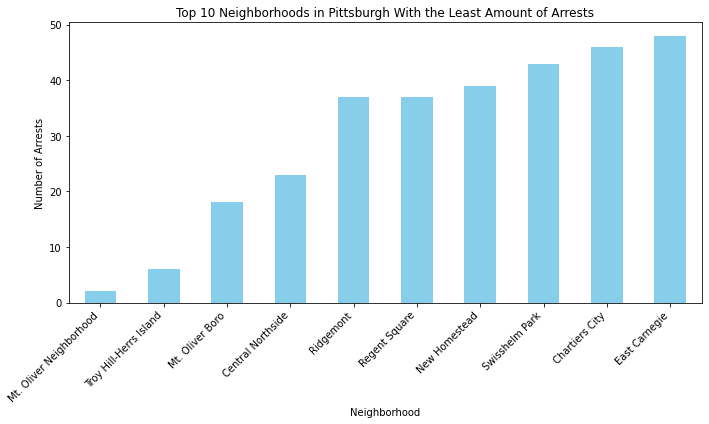

In [21]:
# count the number of arrests in each neighborhood
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts()

# get the 10 neighborhoods with the least amount of crime
safest_neighborhoods = neighborhood_counts.nsmallest(10)

# create a bar plot
plt.figure(figsize=(10, 6))
safest_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods in Pittsburgh With the Least Amount of Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The neighborhood with the least amount of arrests is **Mt. Oliver**

In [22]:
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts()

# list the 10 neighborhoods with the least amount of arrests
highest_crime_neighborhoods = neighborhood_counts.nlargest(10)

print("Neighborhoods:          Arrests:")
print()
for neighborhood, count in highest_crime_neighborhoods.items():
    print(f"{neighborhood.ljust(25)} {count}")


Neighborhoods:          Arrests:

Central Business District 4440
South Side Flats          3497
Carrick                   2351
East Allegheny            2217
Homewood South            2090
Homewood North            1969
East Liberty              1889
Marshall-Shadeland        1516
Bluff                     1502
Mount Washington          1434


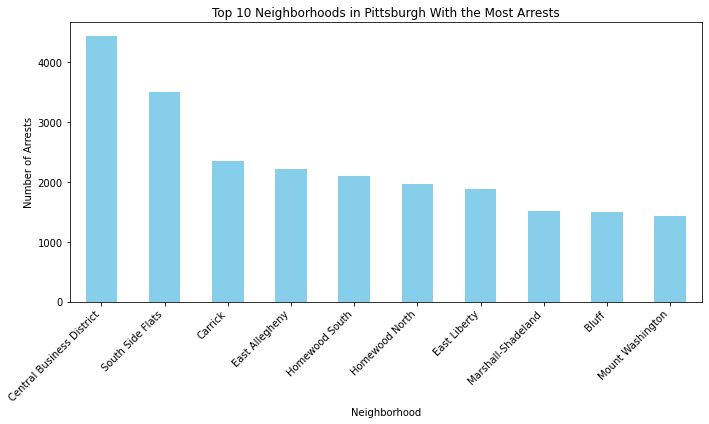

In [23]:
# count the number of arrests in each neighborhood
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts()

# get the 10 neighborhoods with the least amount of arrests
safest_neighborhoods = neighborhood_counts.nlargest(10)

# create a bar plot
plt.figure(figsize=(10, 6))
safest_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods in Pittsburgh With the Most Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion:

using our our data there is a safest neighborhood: which would be southside since there since giving equal weight, the southside is indeed flooded and has the highest condemned housing.

which wins out over mount oliver while safe in terms of crime but not from fellow human beings.